In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
full_dataset = pd.read_excel("./fulldataset.xlsx", index_col=False)
full_dataset["AGE"] = full_dataset["AGE"].str.strip(" years")
full_dataset["HEIGHT"] = full_dataset["HEIGHT"].str.strip(" cm")
full_dataset["WEIGHT"] = full_dataset["WEIGHT"].str.strip(" kg")

full_dataset[["AGE", "HEIGHT", "WEIGHT", "TIME(min)", "C-Peptide", "ISR"]] = full_dataset[["AGE", "HEIGHT", "WEIGHT", "TIME(min)", "C-Peptide", "ISR"]].astype("float64")
full_dataset["BMI"] = full_dataset["WEIGHT"] / (full_dataset["HEIGHT"]/100)**2
full_dataset["BSA"] = np.sqrt((full_dataset["HEIGHT"] * full_dataset["WEIGHT"]) / 3600)
full_dataset

,sample,Sample ID,AGE,HEIGHT,SEX,SUBJECT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA
0,CONT1,1,53.0,163.1,F,normal,77.1,0.0,610.0,1.76,28.983208,1.868973
1,CONT1,1,53.0,163.1,F,normal,77.1,15.0,480.0,1.46,28.983208,1.868973
2,CONT1,1,53.0,163.1,F,normal,77.1,75.0,5190.0,20.30,28.983208,1.868973
3,CONT1,1,53.0,163.1,F,normal,77.1,135.0,4110.0,10.51,28.983208,1.868973
4,CONT1,1,53.0,163.1,F,normal,77.1,180.0,NaN,NaN,28.983208,1.868973
...,...,...,...,...,...,...,...,...,...,...,...,...
3301,DIAB7,176,64.0,179.4,M,NIDDM,81.1,135.0,3730.0,12.71,25.198575,2.010344
3302,DIAB7,176,64.0,179.4,M,NIDDM,81.1,255.0,3550.0,11.91,25.198575,2.010344
3303,DIAB7,176,64.0,179.4,M,NIDDM,81.1,315.0,4530.0,13.15,25.198575,2.010344
3304,DIAB7,176,64.0,179.4,M,NIDDM,81.1,375.0,4050.0,12.43,25.198575,2.010344


In [3]:
full_dataset_cleaned = full_dataset.dropna(subset=["ISR"], how="all")
full_dataset_cleaned.sample(40)


,sample,Sample ID,AGE,HEIGHT,SEX,SUBJECT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA
752,OCT7,45,41.0,177.0,M,NIDDM,102.1,2.0,780.0,3.09,32.589613,2.240517
1586,MARC6,77,41.0,177.0,M,NIDDM,83.1,35.0,810.0,3.91,26.524945,2.021324
2560,NAPR1,131,53.0,173.0,M,NIDDM,115.0,55.0,24100.0,30.08,38.424271,2.350827
1965,DEC15,96,58.0,169.5,F,normal,79.3,40.0,730.0,4.02,27.601570,1.932281
1957,DEC15,96,58.0,169.5,F,normal,79.3,4.0,580.0,5.05,27.601570,1.932281
364,SEP5,23,50.0,179.5,M,NIDDM,91.1,36.0,900.0,3.44,28.274144,2.131278
276,SEP10,18,43.0,170.2,F,NIDDM,109.1,55.0,1290.0,9.38,37.662196,2.271124
894,MARB12,51,39.0,159.5,F,NIDDM,86.0,66.0,4010.0,17.32,33.804699,1.951993
2792,APR12,144,39.0,159.5,F,NIDDM,86.0,36.0,1940.0,10.11,33.804699,1.951993
1709,JANA1,81,49.0,158.0,F,obese,85.4,20.0,1062.0,9.48,34.209261,1.936004


In [4]:
model_dataset = full_dataset_cleaned.dropna(subset=["C-Peptide"], how="all").copy()
model_dataset.drop(columns=["Sample ID"], inplace=True)
model_dataset.columns.unique()
model_dataset = pd.get_dummies(model_dataset, columns=["SEX", "SUBJECT"])
model_dataset = model_dataset[model_dataset["C-Peptide"] > 0]
model_dataset


,sample,AGE,HEIGHT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA,SEX_F,SEX_M,SUBJECT_NIDDM,SUBJECT_normal,SUBJECT_obese
0,CONT1,53.0,163.1,77.1,0.0,610.0,1.76,28.983208,1.868973,True,False,False,True,False
1,CONT1,53.0,163.1,77.1,15.0,480.0,1.46,28.983208,1.868973,True,False,False,True,False
2,CONT1,53.0,163.1,77.1,75.0,5190.0,20.30,28.983208,1.868973,True,False,False,True,False
3,CONT1,53.0,163.1,77.1,135.0,4110.0,10.51,28.983208,1.868973,True,False,False,True,False
7,CONT1,53.0,163.1,77.1,255.0,3230.0,10.30,28.983208,1.868973,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,DIAB7,64.0,179.4,81.1,135.0,3730.0,12.71,25.198575,2.010344,False,True,True,False,False
3302,DIAB7,64.0,179.4,81.1,255.0,3550.0,11.91,25.198575,2.010344,False,True,True,False,False
3303,DIAB7,64.0,179.4,81.1,315.0,4530.0,13.15,25.198575,2.010344,False,True,True,False,False
3304,DIAB7,64.0,179.4,81.1,375.0,4050.0,12.43,25.198575,2.010344,False,True,True,False,False


In [5]:
correlations = model_dataset.corr()["C-Peptide"].sort_values(ascending=False)
correlations

ValueError: could not convert string to float: 'CONT1'

In [ ]:
model_dataset


,sample,AGE,HEIGHT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA,SEX_M,SUBJECT_normal,SUBJECT_obese
0,CONT1,53.0,163.1,77.1,0.0,610.0,1.76,28.983208,1.868973,False,True,False
1,CONT1,53.0,163.1,77.1,15.0,480.0,1.46,28.983208,1.868973,False,True,False
2,CONT1,53.0,163.1,77.1,75.0,5190.0,20.30,28.983208,1.868973,False,True,False
3,CONT1,53.0,163.1,77.1,135.0,4110.0,10.51,28.983208,1.868973,False,True,False
7,CONT1,53.0,163.1,77.1,255.0,3230.0,10.30,28.983208,1.868973,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3301,DIAB7,64.0,179.4,81.1,135.0,3730.0,12.71,25.198575,2.010344,True,False,False
3302,DIAB7,64.0,179.4,81.1,255.0,3550.0,11.91,25.198575,2.010344,True,False,False
3303,DIAB7,64.0,179.4,81.1,315.0,4530.0,13.15,25.198575,2.010344,True,False,False
3304,DIAB7,64.0,179.4,81.1,375.0,4050.0,12.43,25.198575,2.010344,True,False,False


In [10]:
preprocessing = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), ["ISR", "BMI", "WEIGHT", "BSA"])
])
c_pep_none = full_dataset_cleaned[full_dataset_cleaned["C-Peptide"].isna()]
y = np.log1p(model_dataset["C-Peptide"])
X = model_dataset[["ISR", "BMI", "WEIGHT", "BSA"]]

X_test = c_pep_none[["ISR", "BMI", "WEIGHT", "BSA"]]

model_pipeline = Pipeline(steps=[
    ("scale", preprocessing),
    ("model", XGBRegressor(n_estimators=400, max_depth=10, learning_rate=0.05, subsample=1))
])

model_pipeline.fit(X, y)

predictions = model_pipeline.predict(X_test)

predictions = np.expm1(predictions)
c_pep = pd.DataFrame(predictions)
c_pep.rename(columns={0: "C-Peptide"}, inplace=True)
c_pep
c_pep_none = pd.get_dummies(c_pep_none, columns=["SUBJECT", "SEX"])
replaced = c_pep_none.copy()
replaced.drop(columns=["C-Peptide"], inplace=True)
replaced = replaced.reset_index(drop=True)
final_cpep = pd.concat([replaced, c_pep], axis=1)
final_cpep



,sample,Sample ID,AGE,HEIGHT,WEIGHT,TIME(min),ISR,BMI,BSA,SUBJECT_NIDDM,SUBJECT_normal,SUBJECT_obese,SEX_F,SEX_M,C-Peptide
0,CONT1,1,53.0,163.1,77.1,195.0,7.42,28.983208,1.868973,False,True,False,True,False,1981.237305
1,CONT1,1,53.0,163.1,77.1,225.0,8.72,28.983208,1.868973,False,True,False,True,False,1695.811646
2,CONT2,2,45.0,152.0,73.0,195.0,7.39,31.596260,1.755626,False,True,False,True,False,1972.187744
3,CONT2,2,45.0,152.0,73.0,225.0,6.34,31.596260,1.755626,False,True,False,True,False,954.109009
4,CONT3,3,65.0,177.9,106.3,195.0,4.25,33.587785,2.291941,False,True,False,True,False,1375.421753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,JANB1,89,49.0,158.0,85.4,65.0,6.66,34.209261,1.936004,False,False,True,True,False,1370.866455
361,JANB1,89,49.0,158.0,85.4,72.0,5.34,34.209261,1.936004,False,False,True,True,False,1036.907104
362,JANB1,89,49.0,158.0,85.4,74.0,5.29,34.209261,1.936004,False,False,True,True,False,1087.611816
363,JANB1,89,49.0,158.0,85.4,76.0,5.26,34.209261,1.936004,False,False,True,True,False,1026.950439


In [91]:
real_dataset = pd.concat([model_dataset, final_cpep])
real_model_dataset = real_dataset.copy()
real_model_dataset.drop(columns=["Sample ID"], inplace=True)
real_model_dataset
df = real_model_dataset
df

,sample,AGE,HEIGHT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA,SEX_F,SEX_M,SUBJECT_NIDDM,SUBJECT_normal,SUBJECT_obese
0,CONT1,53.0,163.1,77.1,0.0,610.000000,1.76,28.983208,1.868973,True,False,False,True,False
1,CONT1,53.0,163.1,77.1,15.0,480.000000,1.46,28.983208,1.868973,True,False,False,True,False
2,CONT1,53.0,163.1,77.1,75.0,5190.000000,20.30,28.983208,1.868973,True,False,False,True,False
3,CONT1,53.0,163.1,77.1,135.0,4110.000000,10.51,28.983208,1.868973,True,False,False,True,False
7,CONT1,53.0,163.1,77.1,255.0,3230.000000,10.30,28.983208,1.868973,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,JANB1,49.0,158.0,85.4,65.0,1370.866455,6.66,34.209261,1.936004,True,False,False,False,True
361,JANB1,49.0,158.0,85.4,72.0,1036.907104,5.34,34.209261,1.936004,True,False,False,False,True
362,JANB1,49.0,158.0,85.4,74.0,1087.611816,5.29,34.209261,1.936004,True,False,False,False,True
363,JANB1,49.0,158.0,85.4,76.0,1026.950439,5.26,34.209261,1.936004,True,False,False,False,True


In [107]:
def create_lag_features(df, lags=3):
    df_lag = df.copy()
    for lag in range(1, lags + 1):
        df_lag[f"CPeptide_lag{lag}"] = df_lag.groupby("sample")["C-Peptide"].shift(lag)
    return df_lag.dropna()

df_lagged = create_lag_features(df)
features = ["C-Peptide", "CPeptide_lag1", "sample", "CPeptide_lag2", "CPeptide_lag3", 'BMI', 'BSA', 'SEX_M', "SEX_F", 'SUBJECT_normal', 'SUBJECT_obese', "SUBJECT_NIDDM"]
X_rf = df_lagged[features]
y_rf = df_lagged["ISR"]
X_rf


,C-Peptide,CPeptide_lag1,sample,CPeptide_lag2,CPeptide_lag3,BMI,BSA,SEX_M,SEX_F,SUBJECT_normal,SUBJECT_obese,SUBJECT_NIDDM
3,4110.000000,5190.000000,CONT1,480.000000,610.000000,28.983208,1.868973,False,True,True,False,False
7,3230.000000,4110.000000,CONT1,5190.000000,480.000000,28.983208,1.868973,False,True,True,False,False
9,3700.000000,3230.000000,CONT1,4110.000000,5190.000000,28.983208,1.868973,False,True,True,False,False
10,3500.000000,3700.000000,CONT1,3230.000000,4110.000000,28.983208,1.868973,False,True,True,False,False
11,2530.000000,3500.000000,CONT1,3700.000000,3230.000000,28.983208,1.868973,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
360,1370.866455,1193.045166,JANB1,949.923218,1094.678223,34.209261,1.936004,False,True,False,True,False
361,1036.907104,1370.866455,JANB1,1193.045166,949.923218,34.209261,1.936004,False,True,False,True,False
362,1087.611816,1036.907104,JANB1,1370.866455,1193.045166,34.209261,1.936004,False,True,False,True,False
363,1026.950439,1087.611816,JANB1,1036.907104,1370.866455,34.209261,1.936004,False,True,False,True,False


In [111]:

scaling = ColumnTransformer(transformers=[
    ('scale', MinMaxScaler(), ["C-Peptide", "CPeptide_lag1", "CPeptide_lag2", "CPeptide_lag3", 'BMI', 'BSA', 'SEX_M', "SEX_F", 'SUBJECT_normal', 'SUBJECT_obese', "SUBJECT_NIDDM"]
)
])
# X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
#     X_rf, y_rf, test_size=0.2, random_state=42
# )


gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(gss.split(X_rf, y_rf, groups=X_rf["sample"]))

X_train, X_test = X_rf.iloc[train_idx], X_rf.iloc[test_idx]
y_train_rf, y_test_rf = y_rf.iloc[train_idx], y_rf.iloc[test_idx]

X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
X_train_rf.drop(columns=["sample"],inplace=True)
X_test_rf.drop(columns=["sample"],inplace=True)

linear_model = LinearRegression()
xgboost_model = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.05, subsample=1.0, colsample_bytree=0.9, reg_alpha=0.8)
random_forest = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=0.99, max_samples=0.92, random_state=42)

base_model = [("xgboost", xgboost_model),('randomforest', random_forest)]

meta_model = LinearRegression()

stacked_model = StackingRegressor(estimators=base_model, final_estimator=meta_model, passthrough=False)
voting_regressor = VotingRegressor(estimators=base_model)
rf_model = Pipeline(steps=[
        ("scale", scaling),
        ("model", random_forest)
])

rf_model.fit(X_train_rf, y_train_rf)
rf_pred = rf_model.predict(X_test_rf)

print("Voting Regressor RMSE:", np.sqrt(mean_squared_error(y_test_rf, rf_pred)))
print(f'Voting Regressor R2_Score: {r2_score(y_test_rf, rf_pred)}')
print(f'Voting Regressor Mean Absolute Error {mean_absolute_error(y_test_rf, rf_pred)}')

y_test_rf.max()
y_test_rf.min()

Voting Regressor RMSE: 8.017056116264676
Voting Regressor R2_Score: 0.4052764437703765
Voting Regressor Mean Absolute Error 3.2026383505590315


np.float64(0.0)

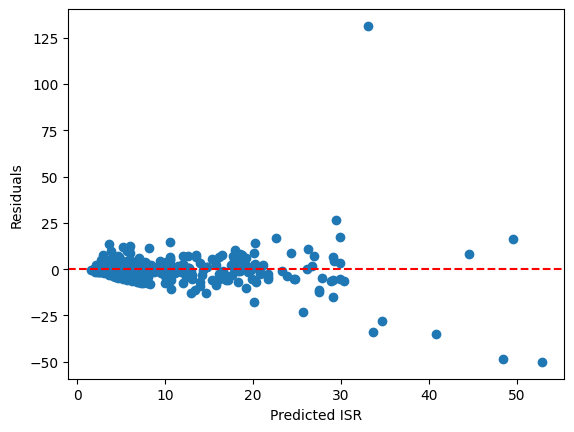

In [102]:
residuals = y_test_rf - rf_pred
plt.scatter(rf_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted ISR")
plt.ylabel("Residuals")
plt.show()



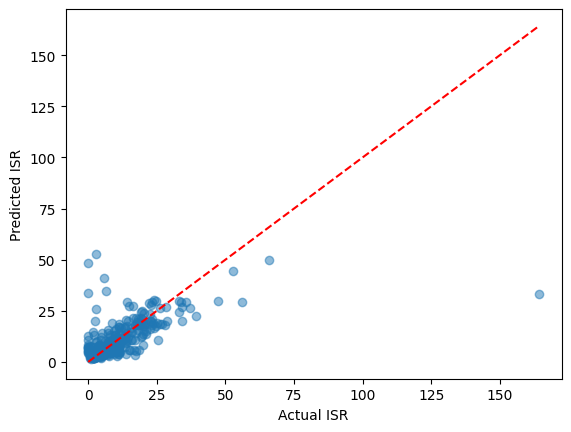

In [103]:
plt.scatter(y_test_rf, rf_pred, alpha=0.5)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'r--')
plt.xlabel("Actual ISR")
plt.ylabel("Predicted ISR")
plt.show()




In [112]:
more_dataset = pd.read_excel("./COMBINED C-PEP _ ISR (1).xlsx", sheet_name="combined")
more_dataset

,Sample ID,Sample,Gender,Age (yr),Height (cm),Weight (kg),BSA (m2),BMI (kg/m2),Group,Time (min),C-Peptide,ISR
0,1,302-003-5,2,41,161.5,105.9,2.079,40.6,1,-10,0.92,0.126326
1,1,302-003-5,2,41,161.5,105.9,2.079,40.6,1,0,0.89,0.130911
2,1,302-003-5,2,41,161.5,105.9,2.079,40.6,1,2,0.91,0.150776
3,1,302-003-5,2,41,161.5,105.9,2.079,40.6,1,4,0.94,0.169623
4,1,302-003-5,2,41,161.5,105.9,2.079,40.6,1,6,0.99,0.183886
...,...,...,...,...,...,...,...,...,...,...,...,...
1057,59,NDC_27,1,63,174.2,97.5,2.120,32.1,2,60,1.36,0.677901
1058,59,NDC_27,1,63,174.2,97.5,2.120,32.1,2,62,5.45,0.825531
1059,59,NDC_27,1,63,174.2,97.5,2.120,32.1,2,64,4.00,0.855425
1060,59,NDC_27,1,63,174.2,97.5,2.120,32.1,2,66,3.55,0.768042


In [125]:
copied_version = more_dataset.copy()
copied_version.drop(columns=["Sample ID", "Group"], inplace=True)
copied_version["Gender"] = copied_version["Gender"].map({1: "M", 2: "F"})
copied_version.rename(columns={"Sample": "sample", "Gender": "SEX", "Age (yr)": "AGE", "Height (cm)": "HEIGHT", "Weight (kg)": "WEIGHT", "BSA (m2)": "BSA", "BMI (kg/m2)": "BMI", "Time (min)": "TIME(min)"}, inplace=True)
copied_version = pd.get_dummies(copied_version, columns=["SEX"], drop_first=False)
copied_version["C-Peptide"] = copied_version["C-Peptide"] * 1000
copied_version["ISR"] = copied_version["ISR"] * 1000


In [ ]:
real_model_dataset.drop(columns=[["SUBJECT_NIDDM", "SUBJECT_normal", "SUBJECT_obese"], inplace=True)
real_model_dataset

KeyError: "['SUBJECT_NIDDM', 'SUBJECT_normal', 'SUBJECT_obese'] not found in axis"